⼩结    
• softmax运算获取⼀个向量并将其映射为概率。    
• softmax回归适⽤于分类问题，它使⽤了softmax运算中输出类别的概率分布。     
• 交叉熵是⼀个衡量两个概率分布之间差异的很好的度量，它测量给定模型编码数据所需的⽐特数。

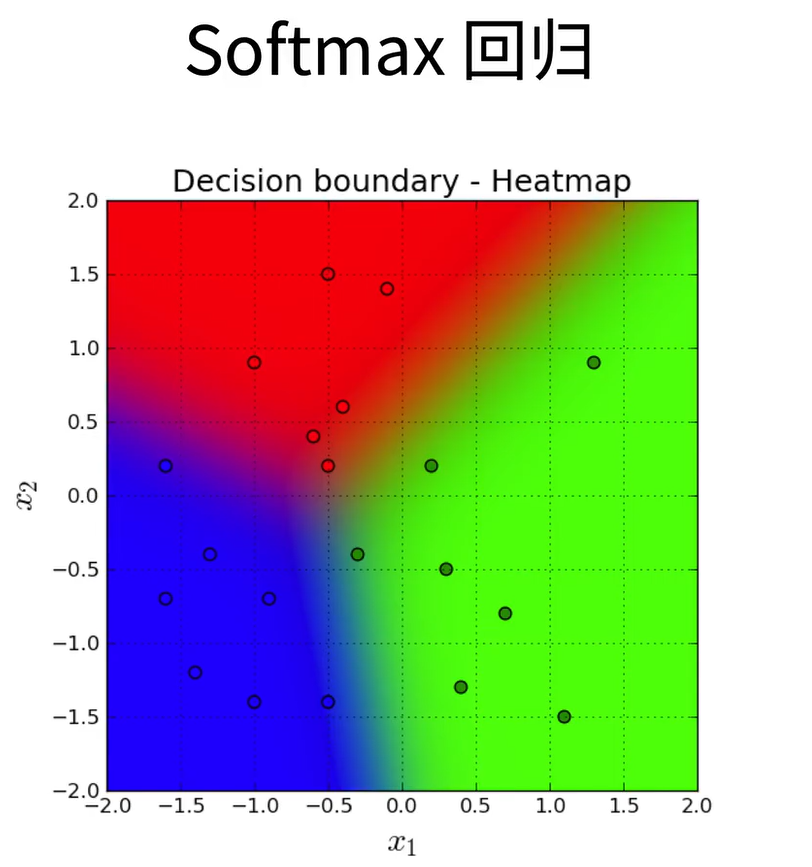
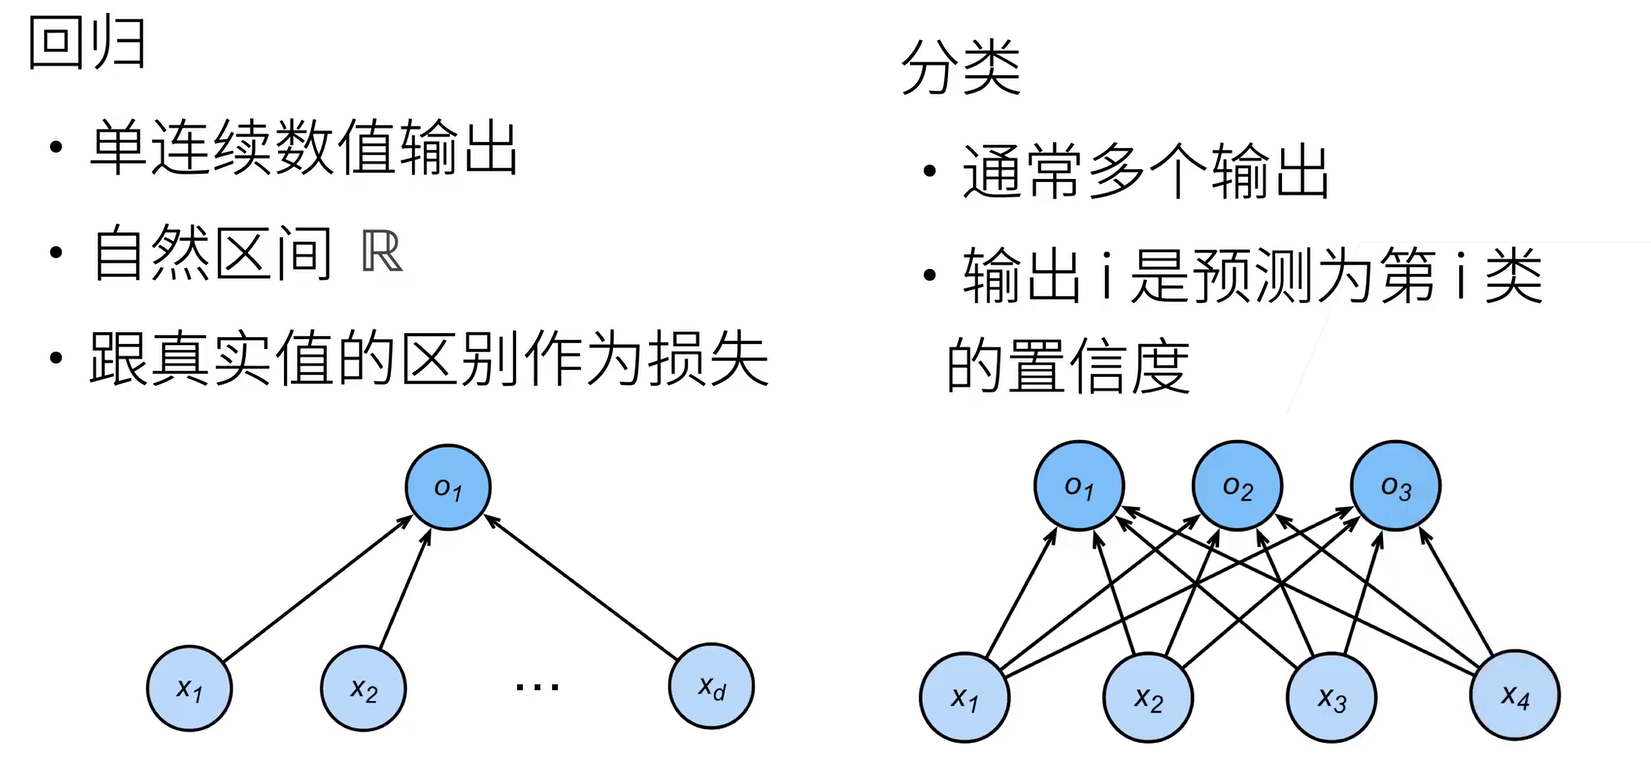
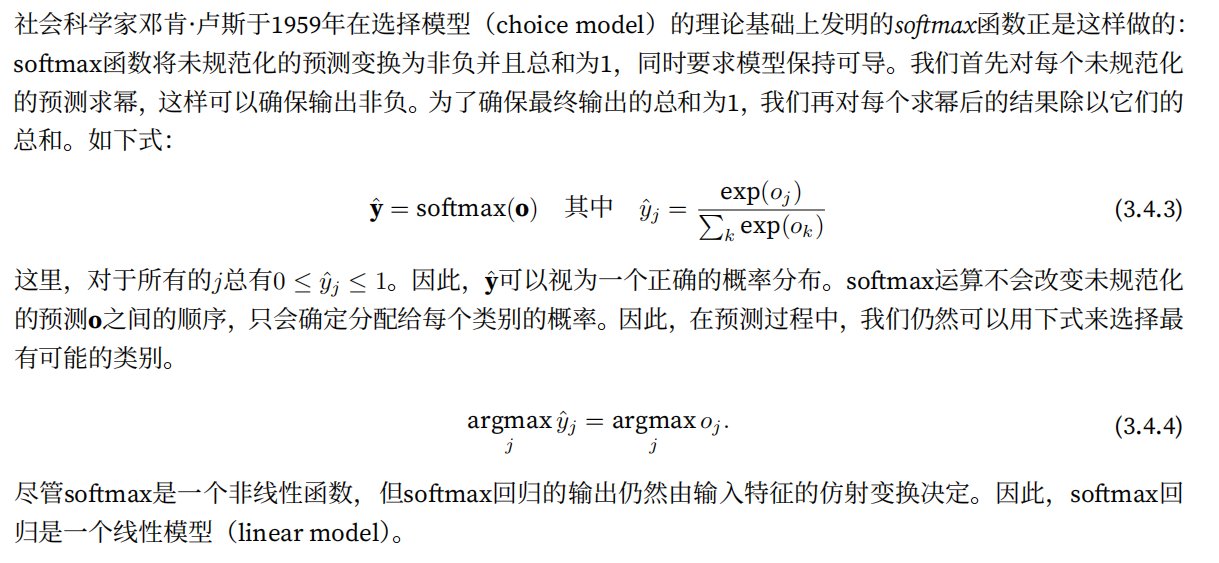
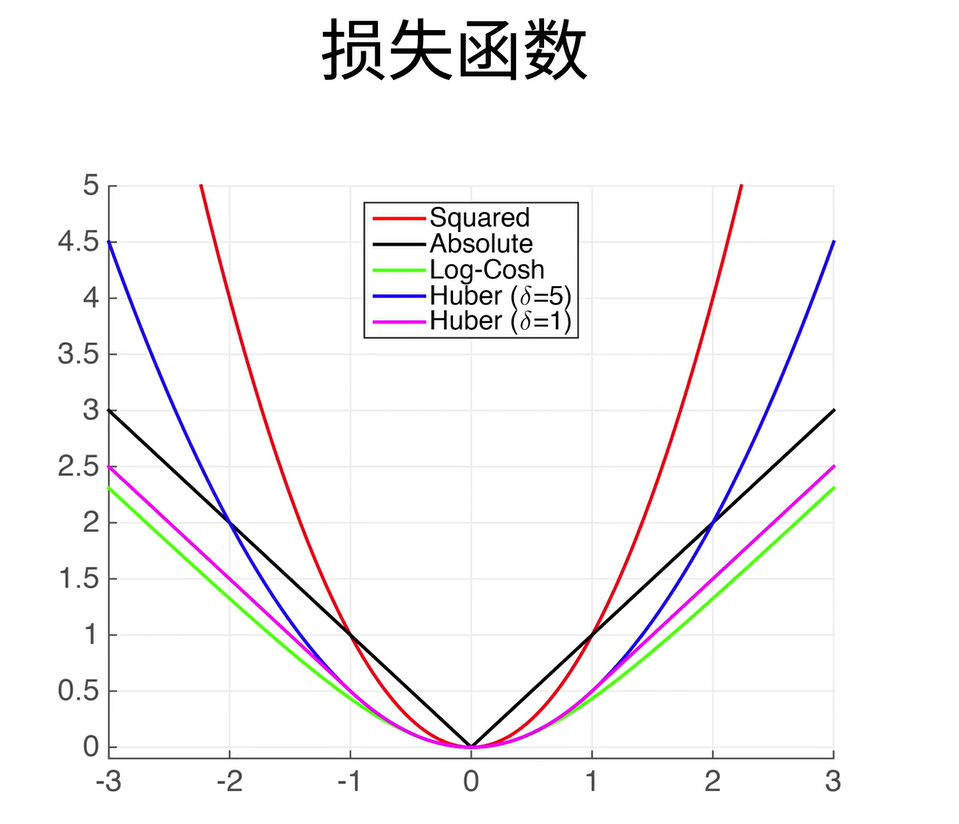
重新审视交叉熵
如果把熵H(P)想象为“知道真实概率的⼈所经历的惊异程度”，那么什么是交叉熵？交叉熵从P到Q，记
为H(P, Q)。你可以把交叉熵想象为“主观概率为Q的观察者在看到根据概率P⽣成的数据时的预期惊异”。
当P = Q时，交叉熵达到最低。在这种情况下，从P到Q的交叉熵是H(P, P) = H(P)。
简而⾔之，我们可以从两⽅⾯来考虑交叉熵分类⽬标：（i）最⼤化观测数据的似然；（ii）最小化传达标签所
需的惊异。

练习
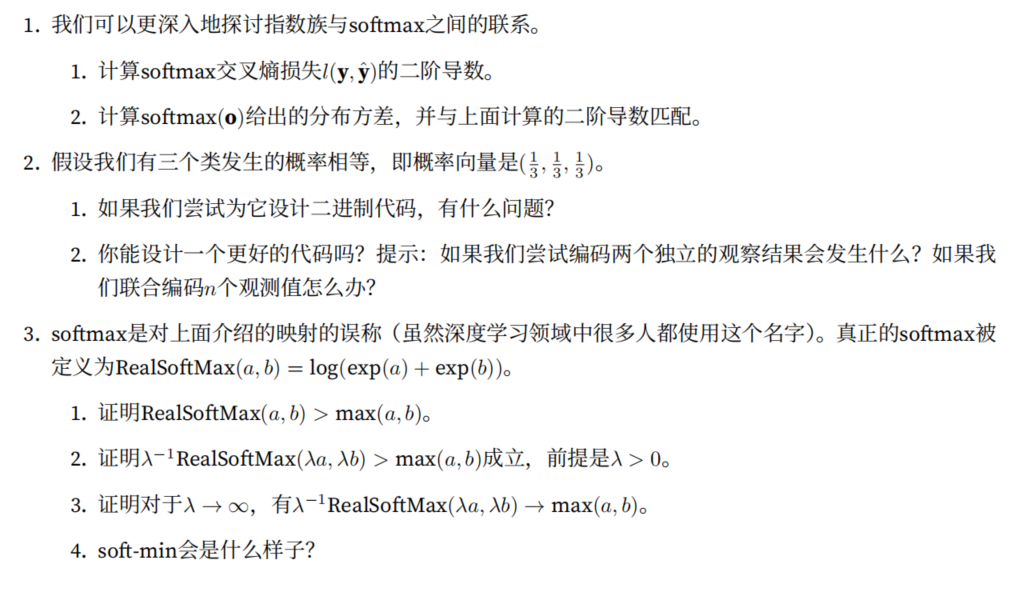
5. 将其扩展到两个以上的数字。

1.<br> 
    (1)$$ 
\begin{gathered}
由书中可知:\frac{l(y, \hat{y})}{\delta_{o j}}=\operatorname{softmax}(o)_{j}-y_{j}\\
则 \frac{l(y, \hat{y})}{\delta_{o j} \delta_{o j}}=\frac{\operatorname{softmax}(o)_{j}-y_{j}}{\delta_{o j}}\\
=\frac{\operatorname{softmax}(o)_{j}}{\delta_{o j}}\\
=\exp \left(o_{j}\right) \frac{1}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}-\frac{\exp \left(o_{j}\right)}{\left(\sum_{k=1}^{q} \exp \left(o_{k}\right)\right)^{2}} \exp \left(o_{j}\right)\\
=\frac{\exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}\left(1-\frac{\exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}\right)\\
=\operatorname{softmax}(o)_{j}\left(1-\operatorname{softmax}(o)_{j}\right)\\
则 \frac{l(y, \hat{y})}{\delta_{o j} \delta_{o i}}=\frac{\operatorname{softmax}(o)_{j}-y_{j}}{\delta_{o i}}\\
=\frac{\operatorname{softmax}(o)_{j}}{\delta_{o i}}\\
=-\frac{\exp \left(o_{j}\right)}{\left(\sum_{k=1}^{q} \exp \left(o_{k}\right)\right)^{2}} \exp \left(o_{i}\right)\\
=-\frac{\exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)} \frac{\exp \left(o_{i}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}\\
=-\operatorname{softmax}(o)_{j} \times \operatorname{softmax}(o)_{i}\\
\end{gathered}
$$
    (2)$$
\text { 有 } E(o)=\sum_{j=1}^{q} \frac{o_{j} \exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)} \\
\text { 有 }E\left(o^{2}\right)=\sum_{j=1}^{q} \frac{o_{j}^{2} \exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)} \\
$$
$$
\begin{aligned}
\operatorname{Var}(o)=E\left(o^{2}\right)-E^{2}(o)
=\sum_{j=1}^{q} \frac{o_{j}^{2} \exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}-\left(\sum_{j=1}^{q} \frac{o_{j} \exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}\right)^{2} \\
=\frac{\sum_{j=1}^{q} o_{j}^{2} \exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}-\left(\frac{\sum_{j=1}^{q} o_{j} \exp \left(o_{j}\right)}{\sum_{k=1}^{q} \exp \left(o_{k}\right)}\right)^{2} \\
=\frac{\sum_{j=1}^{q} o_{j}^{2} \exp \left(o_{j}\right) \sum_{k=1}^{q} \exp \left(o_{k}\right)-\left(\sum_{j=1}^{q} o_{j} \exp \left(o_{j}\right)\right)^{2}}{\left(\sum_{k=1}^{q} \exp \left(o_{k}\right)\right)^{2}} \\
=\frac{\sum_{j=1}^{q} o_{j}^{2} \exp \left(o_{j}\right) \sum_{k=1}^{q} \exp \left(o_{k}\right)-\left(\sum_{j=1}^{q} o_{j} \exp \left(o_{j}\right)\right)^{2}}{\left(\sum_{k=1}^{q} \exp \left(o_{k}\right)\right)^{2}}, \quad \text { if } q \text { is even } \\
= \begin{cases}\frac{\sum_{i=1}^{q / 2} \sum_{j=q / 2 j \neq i}^{q}\left(o_{i}-o_{j}\right)^{2} \exp \left(o_{i}\right) \exp \left(o_{j}\right)}{\left(\sum_{k=1}^{q} \exp \left(o_{k}\right)\right)^{2}}, \\
\frac{\sum_{i=1}^{(q+1) / 2} \sum_{j=(q+1) / 2, j \neq i}^{q}\left(o_{i}-o_{j}\right)^{2} \exp \left(o_{i}\right) \exp \left(o_{j}\right)}{\left(\sum_{k=1} \exp \left(o_{k}\right)\right)^{2}}, \quad \text { if } q \text { is odd }\end{cases} \\
= \begin{cases}\sum_{i=1}^{q / 2} \sum_{j=q / 2, j \neq i}^{q}\left(o_{i}-o_{j}\right)^{2} \operatorname{softmax}\left(o_{i}\right) \operatorname{softmax}\left(o_{j}\right), \\
\sum_{i=1}^{(q+1) / 2} \sum_{j=(q+1) / 2, j \neq i}^{q}\left(o_{i}-o_{j}\right)^{2} \operatorname{softmax}\left(o_{i}\right) \operatorname{softmax}\left(o_{j}\right), \quad \text { if } q \text { is odd }\end{cases}
\end{aligned}
$$
这个式子什么意思呢, 假如说 $q=2$, 那么我们假设 $o_{1}=x, o_{2}=y$
$$
\operatorname{Var}(o)=(x-y)^{2} \operatorname{softmax}(x) \operatorname{softmax}(y)
$$
再假如说 $q=3$, 那么我们假设 $o_{1}=x, o_{2}=y, o_{3}=z$
$$
\operatorname{Var}(o)=(x-y)^{2} \operatorname{softmax}(x) \operatorname{softmax}(y)+(x-z)^{2} \operatorname{softmax}(x) \operatorname{softmax}(z)+(y-z)^{2} \operatorname{softmax}(y) \operatorname{softmax}(z)
$$

2. 哈夫曼编码？

3.<br>
(1)$$
设 a \geq b(因为对称, 所以证明一个另外一个也成立)<br>\\
证 RealSoftMax (a, b)>\max (a, b)\\
即证 : \log (\exp (a)+\exp (b))>a\\
$$
$$
\because \exp (b)>0
$$
$$
\begin{gathered}
\therefore \log (\exp (a)+\exp (b))>\log (\exp (a))=a \\
\text { 即 } \log (\exp (a)+\exp (b))>a
\end{gathered}
$$
(2)$$
\begin{gathered}
\text { 设 } a \geq b \text { (因为对称, 所以证明一个另外一个也成立) } \\
\text { 证 } \lambda^{-1} \operatorname{RealSoftMax}(\lambda a, \lambda b)>\max (a, b),(\lambda>0) \\
\text { 即证 }: \lambda^{-1} \log (\exp (\lambda a)+\exp (\lambda b))>a \\
\because \exp (\lambda b)>0 \\
\therefore \lambda^{-1} \log (\exp (\lambda a)+\exp (\lambda b))>\lambda^{-1} \log (\exp (\lambda a))=\lambda^{-1} \lambda a=a \\
\text { 即 } \lambda^{-1} \operatorname{RealSoftMax}(\lambda a, \lambda b)>\max (a, b),(\lambda>0)
\end{gathered}
$$
(3)$$
\begin{gathered}
设 a \geq b (因为对称, 所以证明一个另外一个也成立)\\
证 \lambda^{-1} RealSoftMax (\lambda a, \lambda b) \rightarrow \max (a, b),(\lambda \rightarrow \infty)\\
即证 $: \lambda^{-1} \log (\exp (\lambda a)+\exp (\lambda b)) \rightarrow a,(\lambda \rightarrow \infty)\\
情况一： a>b
\begin{gathered}
\because \exp (\lambda a)>>\exp (\lambda b) \\
\therefore \lambda^{-1} \log (\exp (\lambda a)+\exp (\lambda b)) \rightarrow \lambda^{-1} \log (\exp (\lambda a))=\lambda^{-1} \lambda a=a \\
\text { 即 } \lambda^{-1} \operatorname{RealSoftMax}(\lambda a, \lambda b) \rightarrow \max (a, b)
\end{gathered}
情况二: a=b
\lambda^{-1} \log (\exp (\lambda a)+\exp (\lambda b))=\lambda^{-1} \log (2 \exp (\lambda a))=\lambda^{-1} \log 2+\lambda^{-1} \lambda a=\lambda^{-1} \log 2+a \\
\because \lambda \rightarrow \infty, \lambda^{-1} \rightarrow 0 \\
\therefore \lambda^{-1} \log 2+a \rightarrow a \\
\text { 即 } \lambda^{-1} \text { RealSoftMax }(\lambda a, \lambda b) \rightarrow \max (a, b)
\end{gathered}
$$    
(4)softmin(x)=softmax(-x)，参考torch.nn.functional.softmin()   
(5)$$
\operatorname{RealSoftMax}\left(x_{1}, x_{2}, \ldots, x_{n}\right)=\log \left(\exp \left(x_{1}\right)+\exp \left(x_{2}\right)+\ldots+\exp \left(x_{n}\right)\right)
$$